In [1]:
!pip install mapclassify contextily geopandas
!pip uninstall rtree
!sudo apt install libspatialindex-dev
!pip install rtree

     |████████████████████████████████| 1.0 MB 6.5 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 16.7 MB 24.8 MB/s 
     |████████████████████████████████| 6.3 MB 32.3 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5

### ***Restaurants in Paris***

Explore a dataset about the restaurants in the center of Paris (compiled from a Paris Data open dataset). The data contains the coordinates of the point locations of the restaurants and a description of the type of restaurant.

* Make a quick visualization of the locations of the districts using the matplotlib `plot()` method.

                                 type              x             y
0                 European restuarant  259641.691646  6.251867e+06
1       Traditional French restaurant  259572.339603  6.252030e+06
2       Traditional French restaurant  259657.276374  6.252143e+06
3  Indian / Middle Eastern restaurant  259684.438330  6.252203e+06
4       Traditional French restaurant  259597.943086  6.252230e+06


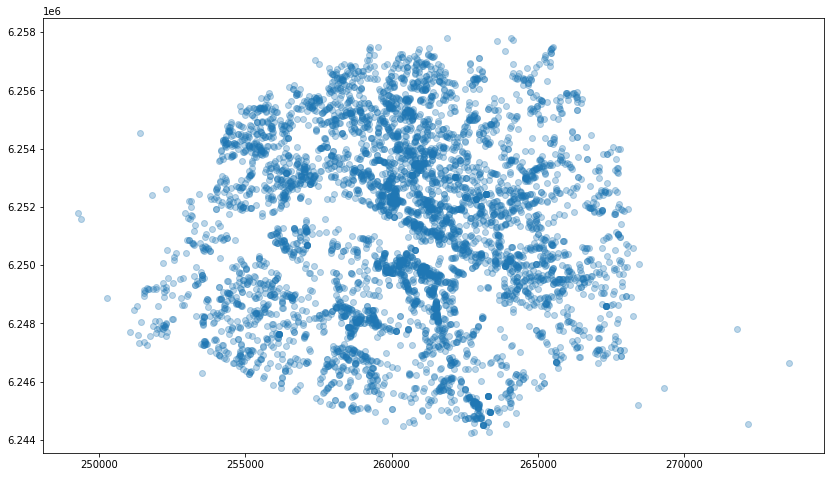

In [ ]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read the restaurants csv file
restaurants = pd.read_csv('paris_restaurants.csv')

# Inspect the first rows of restaurants
print(restaurants.head())

# Make a plot of all points
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(restaurants['x'], restaurants['y'], 'o', alpha=0.3)
plt.show()

### ***Adding a background map***

A plot with just some points can be hard to interpret without any spatial context. Therefore, in this exercise we will learn how to add a background map.

We are going to make use of the `contextily` package. The `add_basemap()` function of this package makes it easy to add a background web map to our plot. We begin by plotting our data first, and then pass the matplotlib axes object to the `add_basemap()` function. `contextily` will then download the web tiles needed for the geographical extent of your plot.

To set the size of the plotted points, we can use the `markersize` keyword of the `plot()` method.

* Import `contextily`.
* Re-do the figure of the previous exercise: make a plot of all the points in `restaurant`.
* Set the marker size equal to 1 to reduce the size of the points.
* Use the `add_basemap()` function of `contextily` to add a background map: the first argument is the matplotlib axes object `ax`.

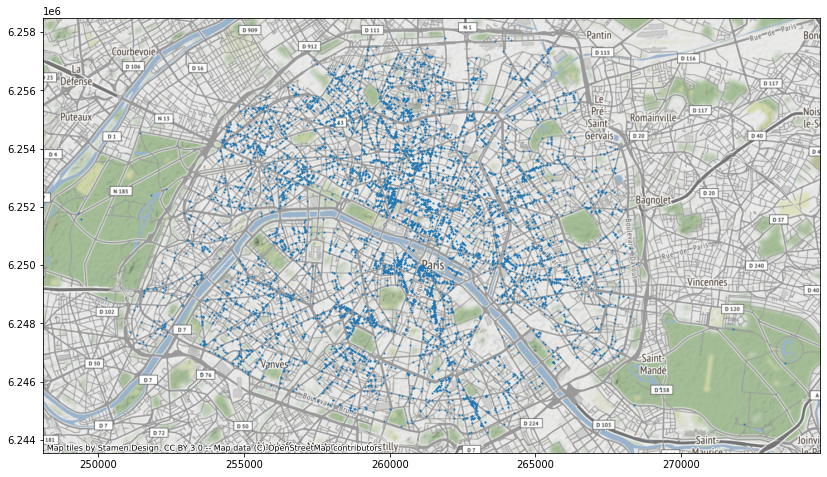

In [ ]:
import pandas as pd
import contextily
import matplotlib.pyplot as plt

restaurants = pd.read_csv('paris_restaurants.csv')

# A figure of all restaurants with background
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(restaurants['x'], restaurants['y'], 'o', markersize=1)
contextily.add_basemap(ax)
plt.show()

# ***Importing geospatial data with GeoPandas***

In [ ]:
import geopandas
countries = geopandas.read_file("countries.geojson")
countries.head()

ADMIN ISO_A3                                           geometry
0        Aruba    ABW  POLYGON ((-69.99694 12.57758, -69.93639 12.531...
1  Afghanistan    AFG  POLYGON ((71.04980 38.40866, 71.05714 38.40903...
2       Angola    AGO  MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...
3     Anguilla    AIA  MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ...
4      Albania    ALB  POLYGON ((19.74777 42.57890, 19.74601 42.57993...

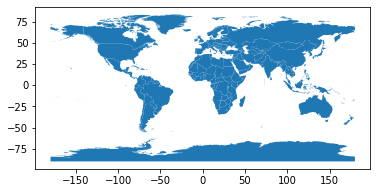

In [ ]:
countries.plot()
plt.show()

# ***Spatial aware DataFrame***

In [ ]:
countries['geometry'].area

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0        0.014119
1       62.591667
2      103.585468
3        0.006891
4        3.039396
          ...    
250      0.232378
251     38.246702
252    113.101342
253     62.815603
254     33.418583
Length: 255, dtype: float64

### ***Explore the Paris districts (I)***

In this exercise, we introduce a next dataset about Paris: the administrative districts of Paris (compiled from a [Paris Data open dataset](https://opendata.paris.fr/explore/dataset/quartier_paris/)).

The dataset is available as a GeoPackage file, a specialised format to store geospatial vector data, and such a file can be read by GeoPandas using the `geopandas.read_file()` function.

To get the first idea of the dataset, we can inspect the first rows with `head()` and do a quick visualization with `plot()`. The attribute information about the districts included in the dataset is the district name and the population (total number of inhabitants of each district).

* Read the districts file (`'paris_districts.gpkg'`) and assign it to a variable called `districts`.
* Print the first 5 rows of the `districts` dataset. What kind of geometries do those datasets contain?
* Make a quick visualization of districts.

   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...  
3  POLYGON ((451004.908 5412654.095, 450960.640 5...  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...  


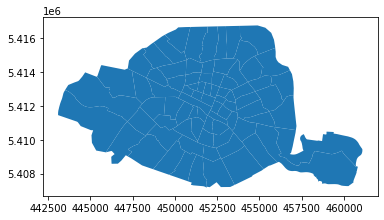

In [ ]:
# Import GeoPandas
import geopandas

# Read the Paris districts dataset
districts = geopandas.read_file('paris_districts_utm.geojson')

# Inspect the first rows
print(districts.head())

# Make a quick visualization of the districts
districts.plot()
plt.show()

### ***Explore the Paris districts (II)***

In the previous exercise, we used the customized `plot()` method of the GeoDataFrame, which produces a simple visualization of the geometries in the dataset. The GeoDataFrame and GeoSeries objects can be seen as "spatial-aware" DataFrame and Series objects, and compared to their pandas counterparts, they expose additional spatial-specific methods and attributes.

The `.geometry` attribute of a GeoDataFrame always returns the column with the geometry objects as a GeoSeries, whichever the actual name of the column (in the default case it will also be called `'geometry'`).

Another example of extra spatial functionality is the `area` attribute, giving the area of the polygons.

* Check what kind of object `districts` is with the `type()` function.
* Access the `geometry` attribute of the `districts` GeoDataFrame and print the `type` of this object.
* Show the first 5 rows of the geometry.
* Inspect the area of the districts's geometries.

In [ ]:
import geopandas

districts = geopandas.read_file('paris_districts_utm.geojson')

# Check what kind of object districts is
print(type(districts))

# Check the type of the geometry attribute
print(type(districts['geometry']))

# Inspect the first rows of the geometry
print(districts['geometry'].head())

# Inspect the area of the districts
print(districts.area)

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
0    POLYGON ((451922.133 5411438.484, 451922.080 5...
1    POLYGON ((452278.419 5412160.893, 452192.407 5...
2    POLYGON ((451553.806 5412340.522, 451528.058 5...
3    POLYGON ((451004.908 5412654.095, 450960.640 5...
4    POLYGON ((451328.752 5412991.278, 451294.721 5...
Name: geometry, dtype: geometry
0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64


### ***The Paris restaurants as a GeoDataFrame***

In the first coding exercise of this chapter, we imported the locations of the restaurants in Paris from a csv file. To enable the geospatial functionality of GeoPandas, we want to convert the pandas DataFrame to a GeoDataFrame. This can be done with the `GeoDataFrame()` constructor and the `geopandas.points_from_xy()` function, and is done for you.

Now we have a GeoDataFrame, all spatial functionality becomes available, such as plotting the geometries. In this exercise we will make the same figure as in the first exercise with the restaurants dataset, but now using the GeoDataFrame's `plot()` method.

* Inspect the first rows of the `restaurants` GeoDataFrame.
* Plot it with the `plot()` method of the GeoDataFrame. The return value is a matplotlib axes object: call this `ax`.
* Again, make sure to set the marker size equal to 1.
* Add a basemap layer using `contextily`.

                                 type              x             y  \
0                 European restuarant  259641.691646  6.251867e+06   
1       Traditional French restaurant  259572.339603  6.252030e+06   
2       Traditional French restaurant  259657.276374  6.252143e+06   
3  Indian / Middle Eastern restaurant  259684.438330  6.252203e+06   
4       Traditional French restaurant  259597.943086  6.252230e+06   

                         geometry  
0  POINT (259641.692 6251867.063)  
1  POINT (259572.340 6252029.683)  
2  POINT (259657.276 6252143.401)  
3  POINT (259684.438 6252203.137)  
4  POINT (259597.943 6252230.044)  


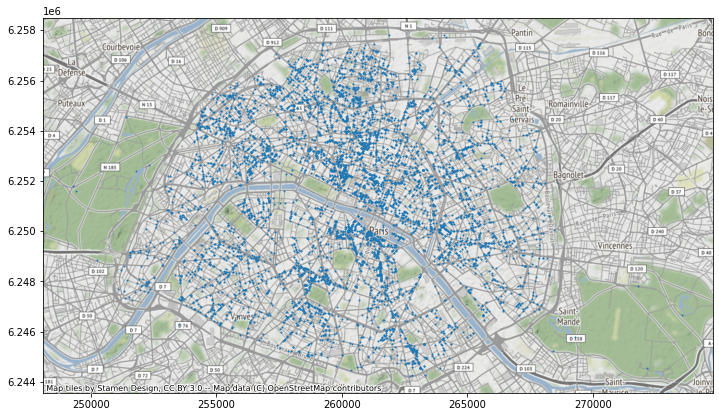

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import contextily

fig, ax = plt.subplots(figsize=(12, 8))

# Read the restaurants csv file into a DataFrame
df = pd.read_csv("paris_restaurants.csv")

# Convert it to a GeoDataFrame
restaurants = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df['x'], df['y']))

# Inspect the first rows of the restaurants GeoDataFrame
print(restaurants.head())

# Make a plot of the restaurants
restaurants.plot(markersize=1, ax=ax)
contextily.add_basemap(ax)
plt.show()

 Here, we used the  `plot()` method of the GeoDataFrame, and we didn't need to specify the `x` and `y` coordinates explicitly.

### ***Visualizing the population density***

Visualize the spatial variation of the population density within the center of Paris. For this, we will first calculate the population density by dividing the population number with the area, and add it as a new column to the dataframe.

* Print the first rows of the `districts` dataset. Do you see the `'population'` column?
* Inspect the area of the districts's geometries.
* Add a column `'population_density'` representing the number of inhabitants per squared kilometer (Note: The area is given in squared meter, so you will need to multiply the result with `10**6`).
* Plot the districts using the `'population_density'` to color the polygons using the `column` keyword..

   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...  
3  POLYGON ((451004.908 5412654.095, 450960.640 5...  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...  
0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64


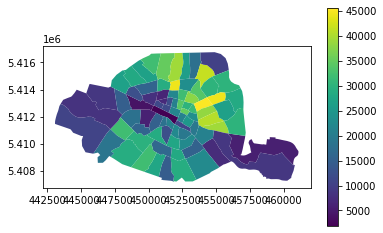

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import contextily

districts = geopandas.read_file('paris_districts_utm.geojson')

# Inspect the first rows of the districts dataset
print(districts.head())

# Inspect the area of the districts
print(districts.area)

# Add a population density column
districts['population_density'] = districts['population'] / districts.area * 10**6

# Make a plot of the districts colored by the population density
districts.plot(column='population_density', legend=True)
plt.show()

### ***Using pandas functionality: groupby***

This course will focus on the spatial functionality of `GeoPandas`, but don't forget that we still have a dataframe, and all functionality you know from Pandas is still applicable.

In this exercise, we will recap a common functionality: the `groupby` operation. You may want to use this operation when you have a column containing groups, and you want to calculate a statistic for each group. In the `groupby()` method, you pass the column that contains the groups. On the resulting object, you can then call the method you want to calculate for each group. In this exercise, we want to know the size of each group of type of restaurants.

* Using `groupby()`, group the restaurants by the *type* of restaurants, and calculate the size of each group. Call the result *type_counts*.
* Print the resulting Series.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import contextily

# Read the restaurants csv file into a DataFrame
df = pd.read_csv("paris_restaurants.csv")

# Convert it to a GeoDataFrame
restaurants = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df['x'], df['y']))

# Calculate the number of restaurants of each type
type_counts = restaurants.groupby('type').size()

# Print the result
print(type_counts)

type
African restaurant                        138
Asian restaurant                         1642
Caribbean restaurant                       27
Central and South American restuarant      97
European restuarant                      1178
Indian / Middle Eastern restaurant        394
Maghrebian restaurant                     207
Other world restaurant                    107
Traditional French restaurant            1945
dtype: int64


So the traditional French restaurants are the most common ones. We wanted to show you the groupby functionality here, but note that for counting values in a column, there is also the `value_counts()` method that does the same.

### ***Plotting multiple layers***

Take the subset of all African restaurants, and then make a multi-layered plot. In such a plot, we combine the visualization of several GeoDataFrames on a single figure. To add one layer, we can use the `ax` keyword of the `plot()` method of a GeoDataFrame to pass it a matplotlib axes object.

* Select a subset of all rows where the `type` is `'African restaurant'`. Call this subset `african_restaurants`.
* Make a plot of all restaurants and use a uniform grey color. Remember to pass a matplotlib axes object to the `plot()` method.
* Add a second layer of only the African restaurants in red. For the typical colors, you can use English names such as 'red' and 'grey'.
* Remove the box using the `set_axis_off()` method on the matplotlib axes object.

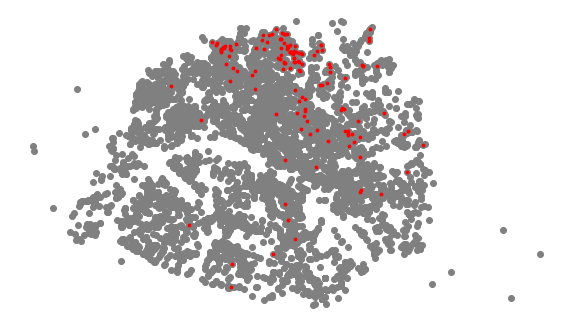

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import contextily

# Read the restaurants csv file into a DataFrame
df = pd.read_csv("paris_restaurants.csv")

# Convert it to a GeoDataFrame
restaurants = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df['x'], df['y']))

# Take a subset of the African restaurants
african_restaurants = restaurants[restaurants['type']=='African restaurant']

# Make a multi-layered plot
fig, ax = plt.subplots(figsize=(10, 10))
restaurants.plot(ax=ax, color='grey')
african_restaurants.plot(ax=ax, color='red', markersize=8)
# Remove the box, ticks and labels
ax.set_axis_off()
plt.show()

### ***Creating a Point geometry***

The location of the Eiffel Tower is: `x` of `255422.6` and `y` of `6250868.9`.

* Import the `Point` class from `shapely`.
* Create a shapely point object with the coordinates of the Eiffel Tower and assign it to a variable called `eiffel_tower`.
* Print the result.

In [ ]:
# Import the Point geometry
from shapely.geometry import Point  

# Construct a point object for the Eiffel Tower
eiffel_tower = Point(255422.6, 6250868.9)

# Print the result
print(eiffel_tower)

POINT (255422.6 6250868.9)


### ***Shapely's spatial methods***

Now we have a shapely `Point` object for the Eiffel Tower, we can use the different methods available on such a geometry object to perform spatial operations, such as 

* calculating a distance or 
* checking a spatial relationship.

We repeated the construction of `eiffel_tower`, and also provide the code that extracts one of the neighbourhoods (the Montparnasse district), as well as one of the restaurants located within Paris.

* Check if the Eiffel Tower is located within the Montparnasse district.
* Check if the Montparnasse district contains the restaurant location.
* Calculate the distance between the Eiffel Tower and the restaurant (note: in this case, the distance is returned in meters).

In [ ]:
from shapely.geometry import Point  
import pandas as pd
import matplotlib.pyplot as plt
import geopandas

districts = geopandas.read_file('paris_districts_utm.geojson')
eiffel_tower = Point(255422.6, 6250868.9)
df = pd.read_csv('paris_restaurants.csv')
restaurants = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df['x'], df['y']))

districts = districts.to_crs(epsg=3857) ### ไฟล์บน ดาต้าแคมพ์ใช้ CRS ไม่เหมือนกับไฟล์แบบฝึกหัด ต้อง convert ก่อน

# Construct a point object for the Eiffel Tower
eiffel_tower = Point(255422.6, 6250868.9)

# Accessing the Montparnasse geometry (Polygon) and restaurant
district_montparnasse = districts.loc[52, 'geometry']
resto = restaurants.loc[956, 'geometry']

# Is the Eiffel Tower located within the Montparnasse district?
print(eiffel_tower.within(district_montparnasse))

# Does the Montparnasse district contains the restaurant?
print(district_montparnasse.contains(resto))

# The distance between the Eiffel Tower and the restaurant?
print(eiffel_tower.distance(resto))

False
True
4431.459825587062


In [ ]:
districts.head()

id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((260998.942 6250132.905, 260998.863 6...  
1  POLYGON ((261530.205 6251237.030, 261402.637 6...  
2  POLYGON ((260428.149 6251500.935, 260390.032 6...  
3  POLYGON ((259590.927 6251970.939, 259525.101 6...  
4  POLYGON ((260077.976 6252488.522, 260027.754 6...

ผลลัพธ์ไม่เหมือนกัน เพราะค่า geometry ใน district_montparnasse ออกมาไม่เหมือนกัน

Note that the **`contains()`** and **`within()`** methods are the opposite of each other: if `geom1.contains(geom2)` is `True`, then also `geom2.within(geom1)` will be `True`.

### ***In which district in the Eiffel Tower located?*** (คำตอบไม่ตรง ไม่รู้ทำไม คือ คอลัมน์ geometry ของไฟล์ที่เขาให้มา กับ geometry ในแบบฝึกหัด ไม่เหมือนกัน ทั้งๆที่ plot ออกมาได้รูปเดียวกัน ???)

Let's return to the Eiffel Tower example. In previous exercises, we constructed a **`Point`** geometry for its location. Let's now determine in which of the districts of Paris it is located.

* Create a filter) indicating whether each district contains the Eiffel Tower or not. Call the result `mask`.
* Filter the `districts` dataframe with the boolean `mask` and print the result.

In [ ]:
from shapely.geometry import Point  
import pandas as pd
import matplotlib.pyplot as plt
import geopandas

districts = geopandas.read_file('paris_districts_utm.geojson')
eiffel_tower = Point(255422.6, 6250868.9)
df = pd.read_csv('paris_restaurants.csv')
restaurants = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df['x'], df['y']))


# Construct a point object for the Eiffel Tower
eiffel_tower = Point(255422.6, 6250868.9)

# Create a boolean Series
mask = districts.contains(eiffel_tower)

# Print the boolean Series
print(mask.head())

# Filter the districts with the boolean mask
print(districts[mask])

0    False
1    False
2    False
3    False
4    False
dtype: bool
Empty GeoDataFrame
Columns: [id, district_name, population, geometry]
Index: []


### ***How far is the closest restaurant?***

Now, we might be interested in the restaurants nearby the Eiffel Tower. To explore them, let's visualize the Eiffel Tower itself as well as the restaurants within 1km.

To do this, we can calculate the distance to the Eiffel Tower for each of the restaurants. Based on this result, we can then create a mask that takes `True` if the restaurant is within 1km, and `False` otherwise, and use it to filter the restaurants GeoDataFrame. Finally, we make a visualization of this subset.

The `restaurants` GeoDataFrame has been loaded, and the `eiffel_tower` object created. 

* Calculate the distance to the Eiffel Tower for each restaurant, and call the result `dist_eiffel`.
* Print the distance to the closest restaurant (which is the minimum of `dist_eiffel`).
* Select the rows the `restaurants` GeoDataFrame where the distance to the Eiffel Tower is less than 1 km (note that the distance is in meters).

460.69760282781715


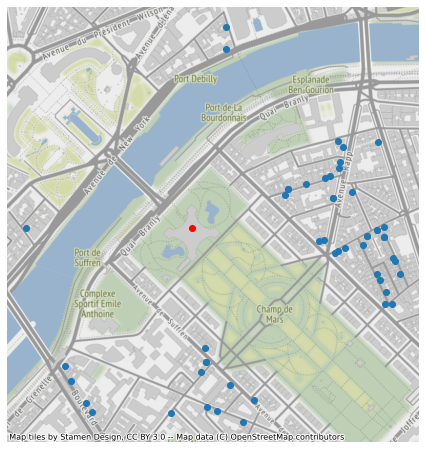

In [ ]:
from shapely.geometry import Point  
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import contextily

eiffel_tower = Point(255422.6, 6250868.9)
df = pd.read_csv('paris_restaurants.csv')
restaurants = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df['x'], df['y']))

# The distance from each restaurant to the Eiffel Tower
dist_eiffel = restaurants.distance(eiffel_tower)

# The distance to the closest restaurant
print(dist_eiffel.min())

# Filter the restaurants for closer than 1 km
restaurants_eiffel = restaurants[dist_eiffel < 1000]

# Make a plot of the close-by restaurants
fig, ax = plt.subplots(figsize=(14,8))
restaurants_eiffel.plot(ax=ax)
geopandas.GeoSeries([eiffel_tower]).plot(ax=ax, color='red')
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

In practice, we will often use the spatial methods like **`within()`**, **`intersects()`**, .. or here by comparing the result of **`distance()`**, to create a boolean mask and take a subset of the original DataFrame.

### ***Spatial Join***

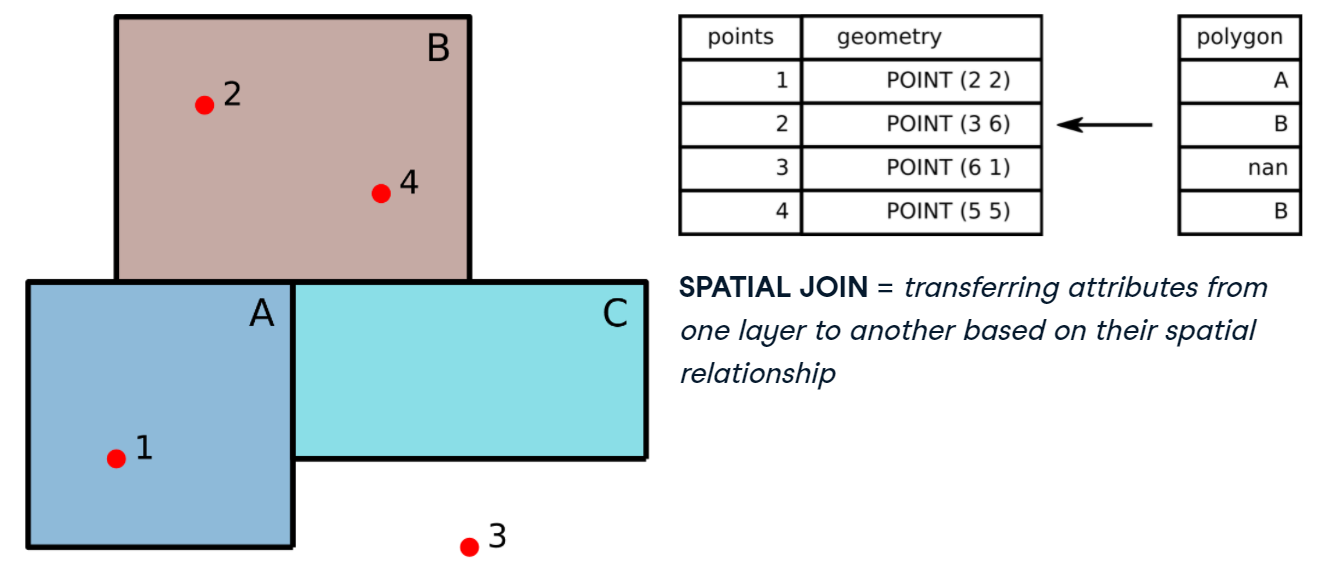


### ***Paris: spatial join of districts and bike stations***

Let's return to the Paris data on districts and bike stations. We will now use the spatial join operation to identify the district in which each station is located.

The districts and bike sharing stations datasets are already pre-loaded for you as the `districts` and `stations` GeoDataFrames, and GeoPandas has been imported as `geopandas`

* Use the **`geopandas.sjoin()`** function to add the district name in which each station is located to the `stations` dataset. Call the result `joined`.
* Check the result by showing the first five rows.

ต้องลงแพคเกจ `rtree` ก่อนตามนี้

```
!pip uninstall rtree
!sudo apt install libspatialindex-dev
!pip install rtree
```

In [ ]:
from shapely.geometry import Point  
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import contextily

districts = geopandas.read_file('paris_districts_utm.geojson')
stations = geopandas.read_file('paris_sharing_bike_stations_utm.geojson')

# Join the districts and stations datasets
joined = geopandas.sjoin(stations, districts, op='within')

# Inspect the first five rows of the result
display(stations.head())
print("\n")

display(districts.head())
print("\n")


joined.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


name  bike_stands  available_bikes  \
0               14002 - RASPAIL QUINET           44                4   
1  20503 - COURS DE VINCENNES PYRÉNÉES           21                3   
2             20011 - PYRÉNÉES-DAGORNO           21                0   
3        31008 - VINCENNES (MONTREUIL)           56                0   
4          43006 - MINIMES (VINCENNES)           28               27   

                         geometry  
0  POINT (450804.449 5409797.268)  
1  POINT (456414.352 5410698.461)  
2  POINT (456366.909 5411563.320)  
3  POINT (458730.707 5411789.995)  
4  POINT (458234.930 5409991.067)

id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...  
3  POLYGON ((451004.908 5412654.095, 450960.640 5...  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...

name  bike_stands  available_bikes  \
0                    14002 - RASPAIL QUINET           44                4   
143  14112 - FAUBOURG SAINT JACQUES CASSINI           16                0   
293               14033 - DAGUERRE GASSENDI           38                1   
346     14006 - SAINT JACQUES TOMBE ISSOIRE           22                0   
429       14111 - DENFERT-ROCHEREAU CASSINI           24                8   

                           geometry  index_right  id district_name  population  
0    POINT (450804.449 5409797.268)           52  53  Montparnasse       18570  
143  POINT (451419.447 5409421.529)           52  53  Montparnasse       18570  
293  POINT (450708.228 5409406.941)           52  53  Montparnasse       18570  
346  POINT (451340.026 5409124.575)           52  53  Montparnasse       18570  
429  POINT (451274.511 5409609.731)           52  53  Montparnasse       18570

You can see how the attribute information of the districts are added as new columns to the stations dataframe. 

### ***Map of tree density by district (1)***

Using a dataset of all trees in public spaces in Paris, the goal is to make a map of the tree density by district. For this, we first need to find out how many trees each district contains. We will then use this result to calculate the density and create a map.

To obtain the tree count by district, we first need to know in which district each tree is located, which we can do with a spatial join. Then, using the result of the spatial join, we will calculate the number of trees located in each district using the pandas 'group-by' functionality.

GeoPandas has been imported as `geopandas`.

* Import the trees dataset `"paris_trees.gpkg"` and call the result `trees`. 

* Also read the `districts` dataset we have seen previously (`"paris_districts_utm.geojson"`), and call this `districts`.
* Add a column with the `'district_name'` to the `trees` dataset using a spatial join. Call the result `joined`.
* Calculate the number of trees located in each district: group the `joined` DataFrame by the `'district_name'` column, and calculate the size of each group. We convert the resulting Series `trees_by_district` to a DataFrame for the next exercise.

In [ ]:
from shapely.geometry import Point  
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import contextily


# Read the trees and districts data
trees = geopandas.read_file("paris_trees_small.gpkg")
districts = geopandas.read_file("paris_districts_utm.geojson")

# Spatial join of the trees and districts datasets
joined = geopandas.sjoin(trees, districts, op='within')

# Calculate the number of trees in each district
trees_by_district = joined.groupby('district_name').size()

# Convert the series to a DataFrame and specify column name
trees_by_district = trees_by_district.to_frame(name='n_trees')

# Inspect the result
print(trees_by_district.head())

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


                 n_trees
district_name           
Amérique             183
Archives               8
Arsenal               60
Arts-et-Metiers       20
Auteuil              392


We calculated the number of trees in each of the districts of Paris. Now, we can make a plot of this, what you will do below.

### ***Map of tree density by district (2)***

Now we have obtained the number of trees by district, we can make the map of the districts colored by the tree density.

For this, we first need to merge the number of trees in each district we calculated in the previous step (`trees_by_district`) back to the `districts` dataset. We will use the `pd.merge()` function to join two dataframes based on a common column.

Since not all districts have the same size, it is a fairer comparison to visualize the tree density: the number of trees relative to the area.

The district dataset has been pre-loaded as `districts`, and the final result of the previous exercise (a DataFrame with the number of trees for each district) is available as `trees_by_district`. GeoPandas has been imported as `geopandas` and Pandas as `pd`.

* Use the `pd.merge()` function to merge districts and `trees_by_district` dataframes on the `'district_name'` column. Call the result `districts_trees`.
* Add a column `'n_trees_per_area'` to the `districts_trees` dataframe, based on the `'n_trees'` column divided by the area.
* Make a plot of the `districts_trees` dataframe, using the `'n_trees_per_area'` column to determine the color of the polygons.


## ***ในแบบฝึกหัด มีการเปลี่ยนตัวเลขของ `trees`***

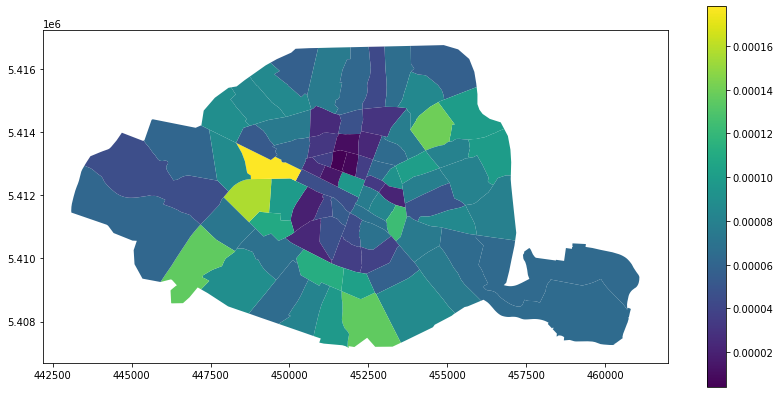

In [ ]:
fig, ax = plt.subplots(figsize=(14,7))

# Merge the 'districts' and 'trees_by_district' dataframes
districts_trees = pd.merge(districts, trees_by_district, on='district_name')

# Add a column with the tree density
districts_trees['n_trees_per_area'] = districts_trees['n_trees'] / districts_trees.geometry.area

# Make of map of the districts colored by 'n_trees_per_area'
districts_trees.plot(column='n_trees_per_area', ax=ax, legend=True)#, scheme='quantiles', k=4, cmap='viridis')
plt.show()

You now used the spatial join in a more complex example, also showing how to combine geopandas functionality with pandas operations in a typical workflow. The last figure you made is called a choropleth.

### ***Equal interval choropleth***

In the last exercise, we created a map of the tree density. Now we know more about choropleths, we will explore this visualisation in more detail.

1. Let's visualize the effect of just using the number of trees versus the number of trees normalized by the area of the district (the tree density). 

2. We will create an equal interval version of this map instead of using a continuous color scale. This classification algorithm will split the value space in equal bins and assign a color to each.

The `district_trees` GeoDataFrame, the final result of the previous exercise is already loaded. It includes the variable `n_trees_per_area`, measuring tree density by district (note the variable has been multiplied by `10,000`).

* Make a plot using the `'n_trees'` variable to color the polygons. Make sure to also display a legend using the `legend` keyword.
* Repeat the same using the `'n_trees_per_area'` variable. Do you see the difference?
* Generate a choropleth with the `'n_trees_per_area'` variable using an equal interval classification scheme. Again, make sure to add a legend.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  n_trees  \
0  POLYGON ((451922.133 5411438.484, 451922.080 5...       40   
1  POLYGON ((452278.419 5412160.893, 452192.407 5...       40   
2  POLYGON ((451553.806 5412340.522, 451528.058 5...        4   
3  POLYGON ((451004.908 5412654.095, 450960.640 5...        7   
4  POLYGON ((451328.752 5412991.278, 451294.721 5...        7   

   n_trees_per_area  
0          0.460544  
1          0.970315  
2          0.146226  
3          0.259922  
4          0.372519  


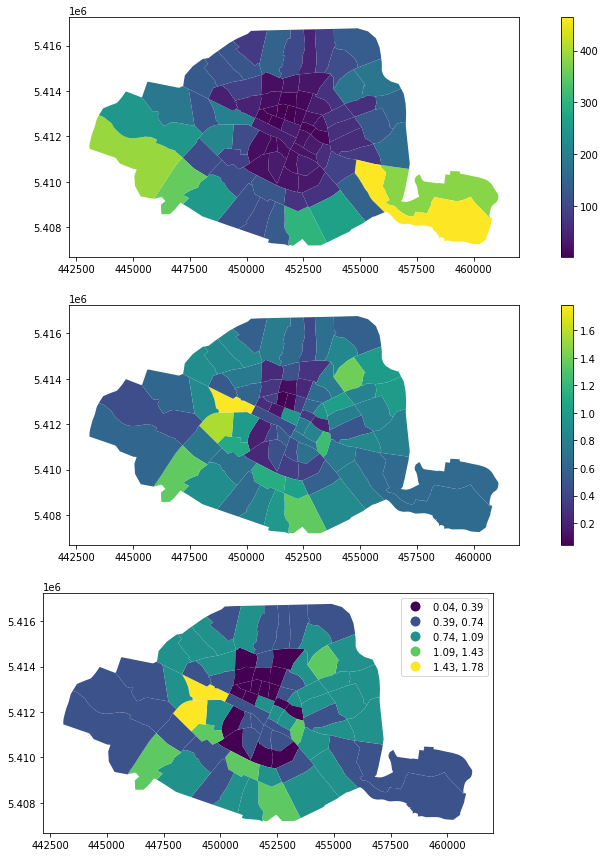

In [ ]:
from shapely.geometry import Point  
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import contextily

fig, ax = plt.subplots(3,1, figsize=(15, 15))
# Read the trees and districts data
trees = geopandas.read_file("paris_trees_small.gpkg")
districts = geopandas.read_file("paris_districts_utm.geojson")
joined = geopandas.sjoin(trees, districts, op='within')
trees_by_district = joined.groupby('district_name').size()
trees_by_district = trees_by_district.to_frame(name='n_trees')
districts_trees = pd.merge(districts, trees_by_district, on='district_name')
districts_trees['n_trees_per_area'] = districts_trees['n_trees'] / districts_trees.geometry.area*10000

# Print the first rows of the tree density dataset
print(districts_trees.head())

# Make a choropleth of the number of trees 
districts_trees.plot(column='n_trees', legend=True, ax=ax[0])

# Make a choropleth of the number of trees per area
districts_trees.plot(column='n_trees_per_area', legend=True, ax=ax[1])

# Make a choropleth of the number of trees 
districts_trees.plot(column='n_trees_per_area', legend=True, scheme='equal_interval', ax=ax[2])
plt.show()

Do you notice the difference between the plots using `n_trees` and `n_trees_per_area`? 

### ***When making choropleths, it is important to always use a variable that is normalized for the area being plotted!*** 

Further, by using a classification scheme instead of a continuous color scale, we can make the map more easily interpretable.

### ***Quantiles choropleth***

Create a quantile version of the tree density map. Remember that the quantile algorithm will rank and split the values into groups with the same number of elements to assign a color to each. This time, we will create seven groups that allocate the colors of the `YlGn` colormap across the entire set of values.

The `district_trees` GeoDataFrame is again already loaded. It includes the variable `n_trees_per_area`, measuring tree density by district (note the variable has been multiplied by `10,000`).

* Generate a choropleth using the `'n_trees_per_area'` variable, a quantile classification `scheme` with `7` classes and the `YlGn` color map. Assign the result to a variable named `ax`.
* Remove the frames, ticks and tick labels from the plot for a cleaner map using the `set_axis_off()` method.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


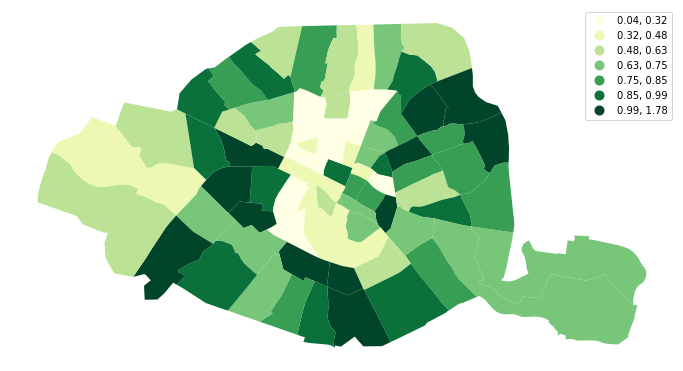

In [ ]:
from shapely.geometry import Point  
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import contextily

fig, ax = plt.subplots(figsize=(12, 7))

trees = geopandas.read_file("paris_trees_small.gpkg")
districts = geopandas.read_file("paris_districts_utm.geojson")
joined = geopandas.sjoin(trees, districts, op='within')
trees_by_district = joined.groupby('district_name').size()
trees_by_district = trees_by_district.to_frame(name='n_trees')
districts_trees = pd.merge(districts, trees_by_district, on='district_name')
districts_trees['n_trees_per_area'] = districts_trees['n_trees'] / districts_trees.geometry.area*10000

# Generate the choropleth and store the axis
districts_trees.plot(column='n_trees_per_area', scheme='quantiles',
                          k=7, cmap='YlGn', legend=True, ax=ax)

# Remove frames, ticks and tick labels from the axis
ax.set_axis_off()
plt.show()  

### ***Compare classification algorithms***

In this final exercise, you will build a multi map figure that will allow you to compare the two approaches to map variables we have seen.

You will rely on standard matplotlib patterns to build a figure with two subplots (Axes `axes[0]` and `axes[1]`) and display in each of them, respectively, an equal interval and quantile based choropleth. Once created, compare them visually to explore the differences that the classification algorithm can have on the final result.

This exercise comes with a GeoDataFrame object loaded under the name `district_trees` that includes the variable `n_trees_per_area`, measuring tree density by district.

* Make a choropleth for the `'n_trees_per_area'` column using the equal interval classification `scheme` on the first subplot (`axes[0]`). Remember that you can pass the matplotlib axes object to the `ax` keyword.
* Do the same for the quantile classification `scheme` on the second subplot (`axes[1]`). As in the previous plot, set the title and remove the box and axis labels to create a cleaner figure.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


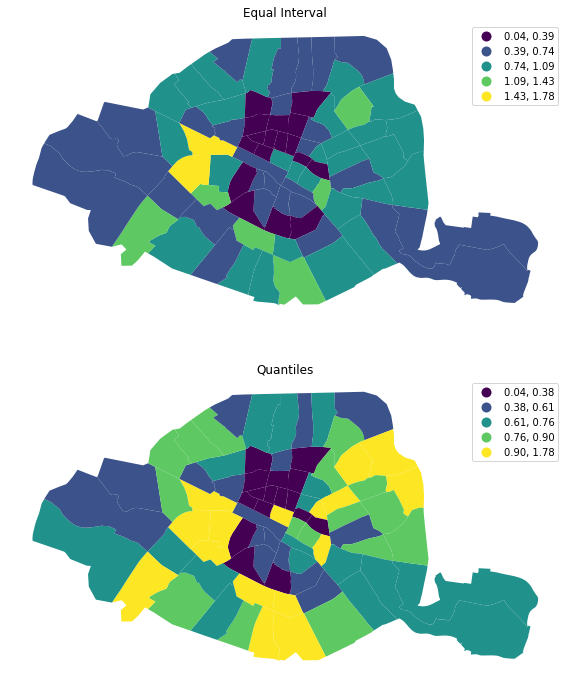

In [ ]:
from shapely.geometry import Point  
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import contextily

trees = geopandas.read_file("paris_trees_small.gpkg")
districts = geopandas.read_file("paris_districts_utm.geojson")
joined = geopandas.sjoin(trees, districts, op='within')
trees_by_district = joined.groupby('district_name').size()
trees_by_district = trees_by_district.to_frame(name='n_trees')
districts_trees = pd.merge(districts, trees_by_district, on='district_name')
districts_trees['n_trees_per_area'] = districts_trees['n_trees'] / districts_trees.geometry.area*10000

fig, axes = plt.subplots(nrows=2, figsize=(12, 12))

# Plot equal interval map
districts_trees.plot(column='n_trees_per_area', scheme='equal_interval', k=5, legend=True, ax=axes[0])
axes[0].set_title('Equal Interval')
axes[0].set_axis_off()

# Plot quantiles map
districts_trees.plot(column='n_trees_per_area', scheme='quantiles', k=5, legend=True, ax=axes[1])
axes[1].set_title('Quantiles')
axes[1].set_axis_off()

# Display maps
plt.show()

### ***Geographic vs projected coordinates***

The ***CRS*** attribute stores the information about the Coordinate Reference System in which the data is represented. In this exercises, we will explore the ***CRS*** and the coordinates of the `districts` dataset about the districts of Paris.

* Look at the  **`.crs`** attribute of the GeoDataFrame. Do you recognize the EPSG number?
* Look at the values of the coordinates. What is the range, and what are the differences between different points? Can this be meters, or are it degrees?

In [ ]:
from shapely.geometry import Point  
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import contextily

districts = geopandas.read_file("paris_districts_utm.geojson")

# Print the CRS information
print(districts.crs)

# Print the first rows of the GeoDataFrame
print(districts.head(5))

epsg:32631
   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...  
3  POLYGON ((451004.908 5412654.095, 450960.640 5...  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...  


ไฟล์มันไม่เหมือนกันกับที่ให้ดาวน์โหลด


```
    id           district_name  population                                           geometry
    0   1  St-Germain-l'Auxerrois        1672  POLYGON ((2.34459 48.85405, 2.34459 48.85405, ...
    1   2                  Halles        8984  POLYGON ((2.34937 48.86058, 2.34822 48.85852, ...
    2   3            Palais-Royal        3195  POLYGON ((2.33947 48.86214, 2.33912 48.86148, ...
    3   4           Place-Vendôme        3044  POLYGON ((2.33194 48.86491, 2.33135 48.86399, ...
    4   5                 Gaillon        1345  POLYGON ((2.33632 48.86797, 2.33587 48.86700, ...
```


Indeed, this dataset (on Datacamp's Browser) above is using geographic coordinates: longitude and latitude in degrees. We could see that the **`crs`** attribute referenced the EPSG:4326 (the code for WGS84, the most common used geographic coordinate system). A further rule of thumb is that the coordinates were in a small range (<180) and cannot be expressing meters.


### ***Projecting a GeoDataFrame***

The Paris districts dataset is provided in geographical coordinates (longitude/latitude in WGS84). To see the result of naively using the data as is for plotting or doing calculations, we will first plot the data as is, and then plot a projected version.

The standard projected CRS for France is the RGF93 / Lambert-93 reference system (referenced by the EPSG:2154 number).

GeoPandas and matplotlib have already been imported, and the `districts` dataset is read and assigned to the `districts` variable.


* Print the CRS of the `districts` dataset.
* Make a simple plot of the `districts` dataset.
* Convert the `districts` to a projected CRS (using the EPSG:2154 for France). * Call the new dataset `districts_RGF93`.
* Make a similar plot of `districts_RGF93`.

epsg:32631


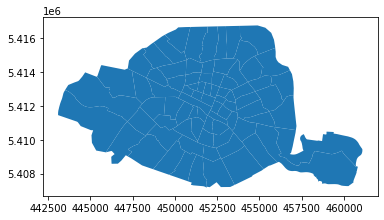

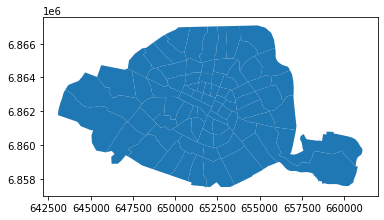

In [ ]:
from shapely.geometry import Point  
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import contextily

districts = geopandas.read_file("paris_districts_utm.geojson")

# Print the CRS information
print(districts.crs)

# Plot the districts dataset
districts.plot()
plt.show()

# Convert the districts to the RGF93 reference system
districts_RGF93 = districts.to_crs(epsg=2154)

# Plot the districts dataset again
districts_RGF93.plot()
plt.show()

Did you notice the difference between both plots? The plot using longitude/latitude degrees distorted the shape of Paris quite a bit.

### ***Projecting a Point***

In the previous chapter, we worked with the Eiffel Tower location. Again, we provided you the coordinates in a projected coordinate system, so you could, for example, calculate distances. Let's return to this iconic landmark, and express its location in geographical coordinates: 48°51′29.6″N, 2°17′40.2″E. Or, in decimals: latitude of 48.8584 and longitude of 2.2945.

Shapely geometry objects have no notion of a CRS, and thus cannot be directly converted to another CRS. Therefore, we are going to use the GeoPandas to transform the Eiffel Tower point location to an alternative CRS. We will put the single point in a GeoSeries, use the **`.to_crs()`** method, and extract the point again.


* Create a shapely point object with the coordinates of the Eiffel Tower and assign it to a variable called `eiffel_tower`.
* Create a GeoSeries (called `s_eiffel_tower`) with the Eiffel Tower as the single element and specify the CRS to be EPSG:4326.
* Convert `s_eiffel_tower` to EPSG:2154, and call the result `s_eiffel_tower_projected`

In [ ]:
# Construct a Point object for the Eiffel Tower
from shapely.geometry import Point
eiffel_tower = Point(2.2945, 48.8584)

# Put the point in a GeoSeries with the correct CRS 

### ต้องใช้ epsg:4326 ใน init เท่านั้น ###
s_eiffel_tower = geopandas.GeoSeries([eiffel_tower], crs={'init': 'epsg:4326'}) 

# Convert to other CRS
s_eiffel_tower_projected = s_eiffel_tower.to_crs(epsg=2154)

# Print the projected point
print(s_eiffel_tower_projected)

0    POINT (648237.302 6862271.682)
dtype: geometry


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


### ***Calculating distance in a projected CRS***

Now we have the Eiffel Tower location in a projected coordinate system, we can calculate the distance to other points.

The final `s_eiffel_tower_projected` of the previous exercise containing the projected Point is already provided, and we extract the single point into the `eiffel_tower` variable. Further, the `restaurants` dataframe (using WGS84 coordinates) is also loaded.

* Convert the `restaurants` to the same CRS as the Eiffel Tower point. For this exercise, don't specify the `epsg` keyword, but make use of the `.crs` attribute.
* Calculate the distance for all restaurants to the Eiffel Tower.
* Print the smallest distance.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import contextily
from shapely.geometry import Point

eiffel_tower = Point(2.2945, 48.8584)
s_eiffel_tower = geopandas.GeoSeries([eiffel_tower], crs={'init': 'epsg:4326'}) 
s_eiffel_tower_projected = s_eiffel_tower.to_crs(epsg=2154)
df = pd.read_csv("restaurants_lonlat.csv")
restaurants = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df['lon'], df['lat']))
restaurants.crs = {'init': 'epsg:4326'}

# Extract the single Point
eiffel_tower = s_eiffel_tower_projected[0]

# Ensure the restaurants use the same CRS
restaurants = restaurants.to_crs(s_eiffel_tower_projected.crs)

# The distance from each restaurant to the Eiffel Tower
dist_eiffel = restaurants.distance(eiffel_tower)

# The distance to the closest restaurant
print(dist_eiffel.min())

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


265.32293498149613


Because our data was now in a projected coordinate reference system that used meters as unit, we know that the result of 303 is actually 303 meter.

* เราได้ 265 เพราะว่าไปทำการแปลงไฟล์ paris_restaruants.csv เอาเอง ปัญหาคือไฟล์นี้ที่ให้อัพโหลด เป็น CRS อะไรก็ไม่รู้ จะเปลี่ยนเป็น epsg=2154 ก็ออกมาเป็น inf หมด เลยต้องหาวิธีเปลี่ยนเป็น lon lat ด้วย

```
df['lon'] = df.geometry.apply(lambda p: p.x)
df['lat'] = df.geometry.apply(lambda p: p.y)
```

แต่ค่าที่ได้มา มันกลับเอาทศนิยมมาแค่ 3 ตำแหน่ง เลยทำให้คำตอบที่ได้ แค่ใกล้เคียง

## ด้านล่าง ปัญหาที่เกิดขึ้นเมื่อใช้ไฟล์ paris_resaturants.csv โดยตรง

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import contextily
from shapely.geometry import Point

eiffel_tower = Point(2.2945, 48.8584)
s_eiffel_tower = geopandas.GeoSeries([eiffel_tower], crs={'init': 'epsg:4326'}) 
s_eiffel_tower_projected = s_eiffel_tower.to_crs(epsg=2154)

df = pd.read_csv("paris_restaurants.csv")
restaurants = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df['x'], df['y']))
restaurants.crs = {'proj': 'longlat', 'datum': 'WGS84', 'no_defs': True}
restaurants = restaurants.to_crs(s_eiffel_tower_projected.crs)
restaurants.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


type              x             y  \
0                 European restuarant  259641.691646  6.251867e+06   
1       Traditional French restaurant  259572.339603  6.252030e+06   
2       Traditional French restaurant  259657.276374  6.252143e+06   
3  Indian / Middle Eastern restaurant  259684.438330  6.252203e+06   
4       Traditional French restaurant  259597.943086  6.252230e+06   

          geometry  
0  POINT (inf inf)  
1  POINT (inf inf)  
2  POINT (inf inf)  
3  POINT (inf inf)  
4  POINT (inf inf)

## ตรงนี้แสดงให้เห็นว่า เมื่อพยายามจะดึงตัวเลขออกมาจาก Point Object (หรือคอลัมน์ geometry) มันเอามาแค่ทศนิยม 3 ตำแหน่ง

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import contextily
from shapely.geometry import Point

eiffel_tower = Point(2.2945, 48.8584)
s_eiffel_tower = geopandas.GeoSeries([eiffel_tower], crs={'init': 'epsg:4326'}) 
s_eiffel_tower_projected = s_eiffel_tower.to_crs(epsg=2154)
df = pd.read_csv("restaurants_lonlat.csv").drop(columns='Unnamed: 0')
restaurants = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df['lon'], df['lat']))
restaurants.crs = {'init': 'epsg:4326'}
restaurants.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


type    lon     lat                  geometry
0                 European restuarant  2.332  48.864  POINT (2.33200 48.86400)
1       Traditional French restaurant  2.332  48.865  POINT (2.33200 48.86500)
2       Traditional French restaurant  2.333  48.866  POINT (2.33300 48.86600)
3  Indian / Middle Eastern restaurant  2.333  48.866  POINT (2.33300 48.86600)
4       Traditional French restaurant  2.332  48.866  POINT (2.33200 48.86600)

### ***Projecting to Web Mercator for using web tiles

In the first chapter, we did an exercise on plotting the restaurant locations in Paris and adding a background map to it using the `contextily` package.

Currently, `contextily` assumes that your data is in the ***Web Mercator*** projection, the system used by most web tile services. And *in that first exercise, we provided the data in the appropriate CRS* so you didn't need to care about this aspect.

***However, typically, <ins>your data will NOT come in Web Mercator (EPSG:3857)</ins> and you will have to align them with web tiles on your own.***

`GeoPandas`, `matplotlib` and `contextily` are already imported.

* Convert the `restaurants` dataset to the Web Mercator projection (EPSG:3857). * Call the result `restaurants_webmercator`.
* Make a plot of this projected dataset (specify the marker size to be 1) and add a background map using `contextily`.



/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


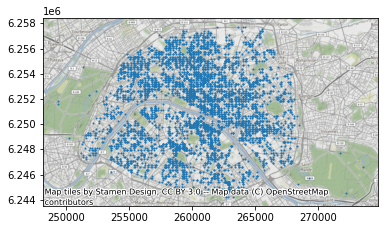

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import contextily
from shapely.geometry import Point

df = pd.read_csv("restaurants_lonlat.csv")
restaurants = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df['lon'], df['lat']))
restaurants.crs = {'init': 'epsg:4326'}

# Convert to the Web Mercator projection
restaurants_webmercator = restaurants.to_crs(epsg=3857)

# Plot the restaurants with a background map
ax = restaurants_webmercator.plot(markersize=1)
contextily.add_basemap(ax)
plt.show()

Remember to ***plot the data <ins>in the correct CRS.</ins>***

### ***Exploring a Land Use dataset (No data file provided)***

For the following exercises, we first introduce a new dataset: a dataset about the land use of Paris (a simplified version based on the open European Urban Atlas). The land use indicates for what kind of activity a certain area is used, such as residential area or for recreation. It is a polygon dataset, with a label representing the land use class for different areas in Paris.

In this exercise, we will read the data, explore it visually, and calculate the total area of the different classes of land use in the area of Paris.

* Read in the `'paris_land_use.shp'` file and assign the result to a variable `land_use`.
* Make a plot of `land_use`, using the `'class'` column to color the polygons.  We also add a legend. Note: it might take a few seconds for the plot to generate because there are a lot of polygons.

* Add a new column `'area'` with the area of each polygon.

* Calculate the total area in km² for each `'class'` using the `groupby()` method, and print the result.


In [ ]:
# Import the land use dataset
land_use = geopandas.read_file('paris_land_use.shp')
print(land_use.head())

# Make a plot of the land use with 'class' as the color
land_use.plot(column='class', legend=True, figsize=(15, 10))
plt.show()

# Add the area as a new column
land_use['area'] = land_use.area

# Calculate the total area for each land use class
total_area = land_use.groupby('class')['area'].sum() / 1000**2
print(total_area)

```
print(land_use.head())

                       class                                           geometry
0               Water bodies  POLYGON ((3751386.281 2890064.323, 3751395.345...
1  Roads and associated land  POLYGON ((3751390.345 2886000.000, 3751390.345...
2  Roads and associated land  POLYGON ((3751390.345 2886898.192, 3751390.370...
3  Roads and associated land  POLYGON ((3751390.345 2887500.000, 3751390.345...
4  Roads and associated land  POLYGON ((3751390.345 2888647.357, 3751390.370...

land_use.groupby('class')['area'].sum() / 1000**2

class
Continuous Urban Fabric             45.943
Discontinuous Dense Urban Fabric     3.657
Green urban areas                    9.858
Industrial, commercial, public      13.295
Railways and associated land         1.936
Roads and associated land            7.402
Sports and leisure facilities        3.579
Water bodies                         3.190
Name: area, dtype: float64
```

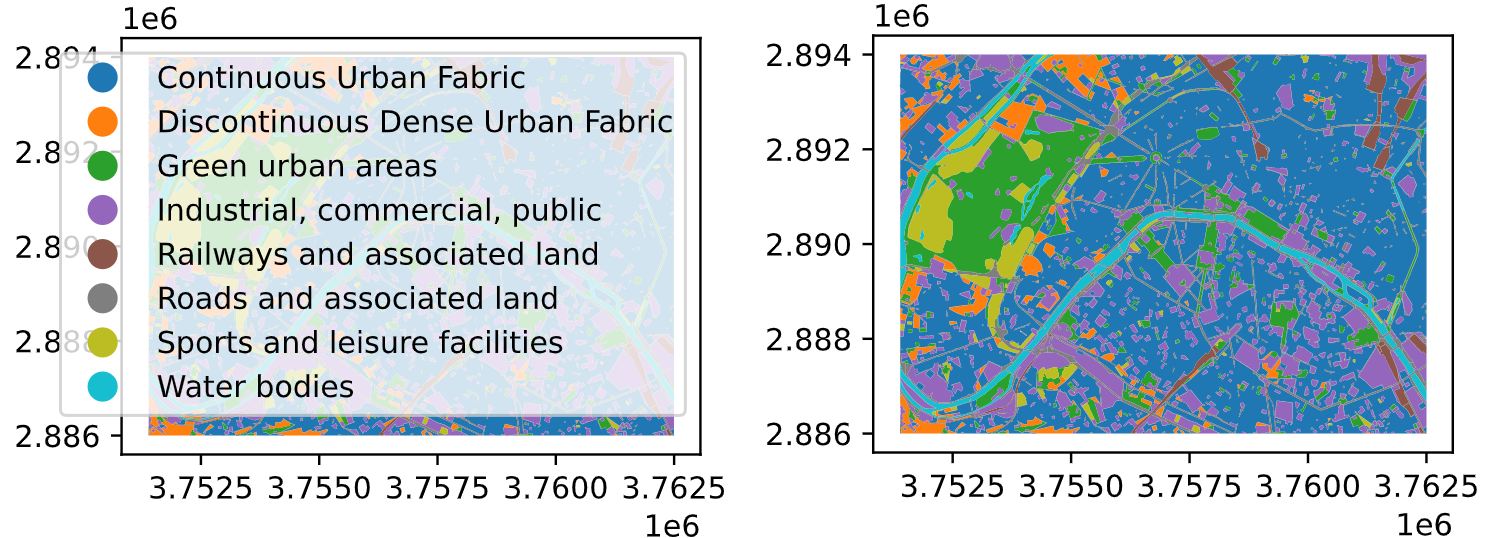

Most of the area in Paris is, quite logically, urban area. There is no agricultural or natural area in this dataset, but we only provided a subset of the data for the center of Paris.

### ***Intersection of two polygons***

For this exercise, we are going to use 2 individual polygons: the district of Muette extracted from the `districts` dataset, and the green urban area of Boulogne, a large public park in the west of Paris, extracted from the `land_use` dataset. The two polygons have already been assigned to the `muette` and `park_boulogne` variables.

We first visualize the two polygons. You will see that they overlap, but the park is not fully located in the district of Muette. Let's determine the overlapping part.

GeoPandas and matplotlib and are already imported.

* Plot the two polygons in a single map to examine visually the degree of overlap

* Calculate the intersection of the `park_boulogne` and `muette` polygons.

* Print the proportion of the area of the district that is occupied by the park.

In [ ]:
# Plot the two polygons
geopandas.GeoSeries([park_boulogne, muette]).plot(alpha=0.5, color=['green', 'blue'])
plt.show()

# Calculate the intersection of both polygons
intersection = park_boulogne.intersection(muette)

# Plot the intersection
geopandas.GeoSeries([intersection]).plot()
plt.show()

# Print proportion of district area that is occupied by the park
print(intersection.area / muette.area)

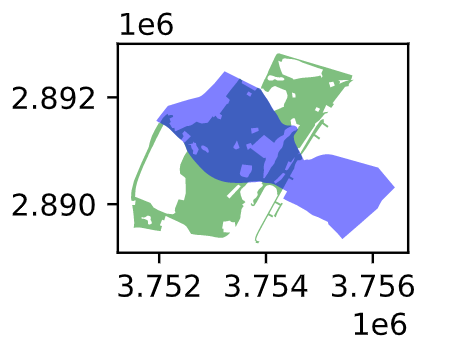

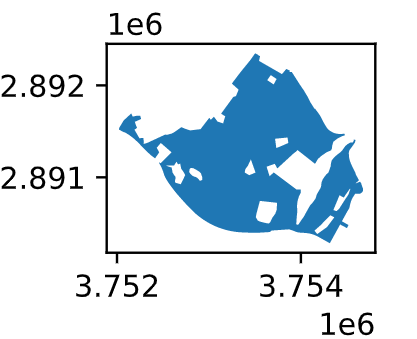


```
type(muette)
shapely.geometry.polygon.Polygon

type(park_boulogne)
shapely.geometry.polygon.Polygon

type(intersection)
shapely.geometry.polygon.Polygon

intersection.area
2384515.692318918

muette.area
5479022.599322913

intersection.area / muette.area
0.4352082235641065
```

Do you see how we created a new geometry of the intersection of both polygons? We now intersected a single polygon with the ***Muette*** district, but in the next exercise we will see how to intersect the full land use dataset with it.

### ***Intersecting a GeoDataFrame with a Polygon***

Combining the `land_use` dataset and the `districts` dataset, we can now investigate what the land use is in a certain district.

For that, we first need to determine the intersection of the land use dataset with a given district. Let's take again the Muette district as example case.

The `land_use` and `districts` datasets have already been imported as `land_use` and `districts`, and the Muette district has been extracted into the muette shapely polygon. Further, GeoPandas and matplotlib are imported.

* Calculate the intersection of the `land_use` polygons with the single muette polygon. Call the result `land_use_muette`.
* Make a quick plot of this intersection, and pass `edgecolor='black'` to more clearly see the boundaries of the different polygons.
* Print the first five rows of `land_use_muette`.

In [ ]:
# Print the land use datset and Notre-Dame district polygon
print(land_use.head())
print(type(muette))

# Calculate the intersection of the land use polygons with Notre Dame
land_use_muette = land_use.intersection(muette)

# Plot the intersection
land_use_muette.plot(edgecolor='black')
plt.show()

# Print the first five rows of the intersection
print(land_use_muette.head())

```
land_use.head()

                            class                                           geometry
0  Industrial, commercial, public  POLYGON ((3751385.614 2895114.545, 3751395.345...
1                    Water bodies  POLYGON ((3751386.281 2890064.323, 3751395.345...
2       Roads and associated land  POLYGON ((3751390.345 2886000.000, 3751390.345...
3       Roads and associated land  POLYGON ((3751390.345 2886898.192, 3751390.370...
4       Roads and associated land  POLYGON ((3751390.345 2887500.000, 3751390.345...

type(muette)
shapely.geometry.polygon.Polygon
```
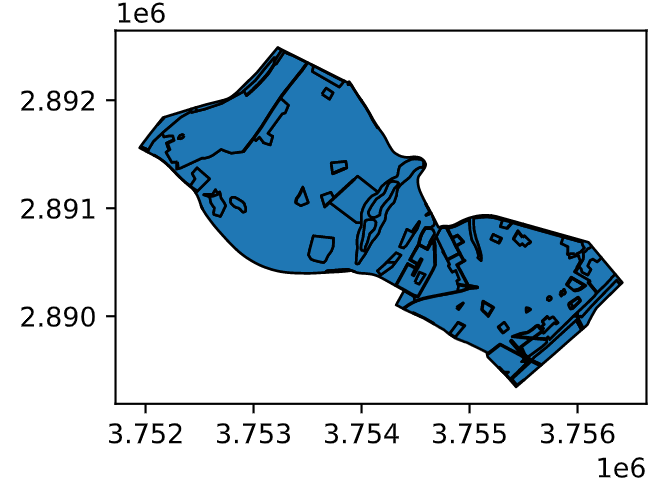

```
land_use_muette.head()

0    POLYGON EMPTY
1    POLYGON EMPTY
2    POLYGON EMPTY
3    POLYGON EMPTY
4    POLYGON EMPTY
dtype: geometry
```

You can see in the plot that we now only have a subset of the full `land_use` dataset. The `land_use_muette` still has the same number of rows as the original `land_use`, though. But many of the rows, as you could see by printing the first rows, consist now of empty polygons when it did not intersect with the Muette district.

# ***Aside: How to create polygon object from latitude and longtitude***


In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon

lat_point_list = [50.854457, 52.518172, 50.072651, 48.853033, 50.854457]
lon_point_list = [4.377184, 13.407759, 14.435935, 2.349553, 4.377184]

polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
crs = {'init': 'epsg:4326'}
polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])       

polygon.to_file(filename='polygon.geojson', driver='GeoJSON')
polygon.to_file(filename='polygon.shp', driver="ESRI Shapefile")

# Created polygon can be visualized with folium 0.12.1 too:

import folium
m = folium.Map([50.854457, 4.377184], zoom_start=5, tiles='cartodbpositron')
folium.GeoJson(polygon).add_to(m)
folium.LatLngPopup().add_to(m)

m


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
type(polygon)

geopandas.geodataframe.GeoDataFrame

# ***Aside: Create polygon from shapely point object***

In [ ]:
from shapely import geometry

p1 = geometry.Point(0,0)
p2 = geometry.Point(1,0)
p3 = geometry.Point(1,1)
p4 = geometry.Point(0,1)

pointList = [p1, p2, p3, p4, p1]
poly = geometry.Polygon([[p.x, p.y] for p in pointList])

print(poly.wkt)

POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))


In [ ]:
type(poly)

shapely.geometry.polygon.Polygon

### ***Overlay of two polygon layers***

Going back to the `land_use` and `districts` datasets, we will now combine both datasets in an overlay operation. Create a new GeoDataFrame consisting of the intersection of the `land_use` polygons with each of the `districts`, but make sure to bring the attribute data from both source layers.

GeoPandas is already imported.

* Print the first rows of both datasets (`land_use` and `districts`).
* Create a new GeoDataFrame from the intersections of `land_use` and `districts`. Assign the result to a variable combined.
* Print the first rows the resulting GeoDataFrame (combined).

In [ ]:
# Print the first five rows of both datasets
print(land_use.head())
print(districts.head())

# Overlay both datasets based on the intersection
combined = geopandas.overlay(land_use, districts, how='intersection')

# Print the first five rows of the result
print(combined.head())


land_use.head()

```
                             class                                           geometry
    0  Industrial, commercial, public  POLYGON ((3751385.614 2895114.545, 3751395.345...
    1                    Water bodies  POLYGON ((3751386.281 2890064.323, 3751395.345...
    2       Roads and associated land  POLYGON ((3751390.345 2886000.000, 3751390.345...
    3       Roads and associated land  POLYGON ((3751390.345 2886898.192, 3751390.370...
    4       Roads and associated land  POLYGON ((3751390.345 2887500.000, 3751390.345...
```
districts.head()
```
       id           district_name  population                                           geometry
    0   1  St-Germain-l'Auxerrois        1672  POLYGON ((3760188.135 2889260.457, 3760188.075...
    1   2                  Halles        8984  POLYGON ((3760610.022 2889946.422, 3760503.163...
    2   3            Palais-Royal        3195  POLYGON ((3759905.524 2890194.454, 3759873.112...
    3   4           Place-Vendôme        3044  POLYGON ((3759388.396 2890559.229, 3759334.824...
    4   5                 Gaillon        1345  POLYGON ((3759742.125 2890864.394, 3759698.189...
```
combined.head()
```
                           class  id district_name  population  \
    0               Water bodies  61       Auteuil       67967   
    1    Continuous Urban Fabric  61       Auteuil       67967   
    2  Roads and associated land  61       Auteuil       67967   
    3          Green urban areas  61       Auteuil       67967   
    4  Roads and associated land  61       Auteuil       67967   
    
                                                geometry  
    0  POLYGON ((3751395.345 2890118.001, 3751395.345...  
    1  MULTIPOLYGON (((3753253.104 2888254.529, 37532...  
    2  POLYGON ((3751519.830 2890061.509, 3751522.057...  
    3  MULTIPOLYGON (((3754314.717 2890283.121, 37543...  
    4  POLYGON ((3751619.113 2890500.000, 3751626.627...  
```

You can see in the resulting GeoDataFrame that we now have both information on the `land_use`'s class and the `districts`' name for each intersecting polygon.

### ***Inspecting the overlay result***

Now that we created the overlay of the land use and districts datasets, we can more easily inspect the land use for the different districts. Let's get back to the example district of Muette, and inspect the land use of that district.

GeoPandas and Matplotlib are already imported. The result of the `overlay()` function from the previous exercises is available as combined.

* Add a new column `'area'` with the area of each polygon to the combined GeoDataFrame.
* Create a subset called `land_use_muette` where the `'district_name'` is equal to `"Muette"`.
* Make a plot of `land_use_muette`, using the `'class'` column to color the polygons.
* Calculate the total area for each `'class'` of `land_use_muette` using the `groupby()` method, and print the result.

In [ ]:
# Print the first rows of the overlay result
print(combined.head())

# Add the area as a column
combined['area'] = combined.area

# Take a subset for the Muette district
land_use_muette = combined[combined['district_name'] == "Muette"]

# Visualize the land use of the Muette district
land_use_muette.plot(column='class')
plt.show()

# Calculate the total area for each land use class
print(land_use_muette.groupby('class')['area'].sum() / 1000**2)

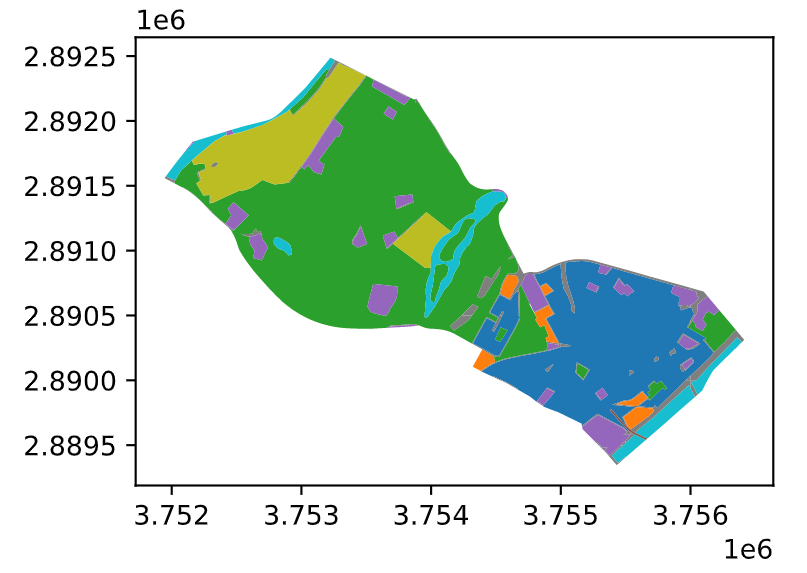

combined.head()

```
                           class  id district_name  population  \
    0               Water bodies  61       Auteuil       67967   
    1    Continuous Urban Fabric  61       Auteuil       67967   
    2  Roads and associated land  61       Auteuil       67967   
    3          Green urban areas  61       Auteuil       67967   
    4  Roads and associated land  61       Auteuil       67967   
    
                                                geometry  
    0  POLYGON ((3751395.345 2890118.001, 3751395.345...  
    1  MULTIPOLYGON (((3753253.104 2888254.529, 37532...  
    2  POLYGON ((3751519.830 2890061.509, 3751522.057...  
    3  MULTIPOLYGON (((3754314.717 2890283.121, 37543...  
    4  POLYGON ((3751619.113 2890500.000, 3751626.627...  
```

land_use_muette.groupby('class')['area'].sum() / 1000**2

```
    class
    Continuous Urban Fabric             1.275
    Discontinuous Dense Urban Fabric    0.088
    Green urban areas                   2.624
    Industrial, commercial, public      0.363
    Railways and associated land        0.005
    Roads and associated land           0.226
    Sports and leisure facilities       0.604
    Water bodies                        0.292
    Name: area, dtype: float64
```

### ***Import and explore the data***

Start with reading and exploring two new datasets:

* First, a dataset on artisanal mining sites in Eastern Congo (adapted from [IPIS](http://ipisresearch.be/home/conflict-mapping/maps/open-data/) open data).
* Second, a dataset on the national parks in Congo (adapted from the [World Resources Institute](https://www.wri.org/)).

For each of those datasets, the exercise consists of 
* importing the necessary packages
* reading the data with **`geopandas.read_file()`**
* inspecting the first 5 rows and the Coordinate Reference System (CRS) of the data
* making a quick visualization.

* Read and explore the mining site data (`"ipis_cod_mines.geojson"`), assigning it to a variable called `mining_sites`.

* Adapt your code to do the same for the national park data (`"cod_conservation.shp"`, assign to a variable `national_parks`).

visit_date                                name  n_workers mineral  \
0  2013-03-27                           Mayi-Tatu      150.0    Gold   
1  2013-03-27                             Mabanga      115.0    Gold   
2  2013-03-27                             Molende      130.0    Gold   
3  2013-03-27                          Embouchure      135.0    Gold   
4  2013-03-27  Apumu-Atandele-Jerusalem-Luka Yayo      270.0    Gold   

                   geometry  
0  POINT (29.66033 1.01089)  
1  POINT (29.65862 1.00308)  
2  POINT (29.65629 0.98563)  
3  POINT (29.64494 0.99976)  
4  POINT (29.66000 0.95600)

epsg:4326


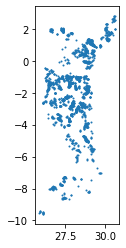

In [6]:
# Import GeoPandas and Matplotlib
import geopandas
import matplotlib.pyplot as plt

# Read the mining site data
mining_sites = geopandas.read_file("ipis_cod_mines.geojson")

# Print the first rows and the CRS information
display(mining_sites.head())
print(mining_sites.crs)

# Make a quick visualisation
mining_sites.plot(markersize=1)
plt.show()

In [ ]:
# Import GeoPandas and Matplotlib
import geopandas
import matplotlib.pyplot as plt

# Read the mining site data
national_parks = geopandas.read_file("cod_conservation.shp")

# Print the first rows and the CRS information
print(national_parks.head())
print(national_parks.crs)

# Make a quick visualisation
national_parks.plot()
plt.show()


national_parks.head()
```
   
             Type                    Name                                           geometry
0  Nature Reserve  Luki Biosphere Reserve  POLYGON ((1469015.469 -605537.842, 1469079.666...
1  Nature Reserve  Itombwe Nature Reserve  POLYGON ((3132067.854 -408115.011, 3132021.543...
2  Nature Reserve    Okapi Faunal Reserve  POLYGON ((3197982.926 148235.506, 3202464.223 ...
3   National park   Salonga National park  POLYGON ((2384337.186 -280729.974, 2384339.382...
4   National park   Salonga National park  POLYGON ((2399938.984 -152211.494, 2399998.750...
```

national_parks.crs

```
<Projected CRS: PROJCS["Mercator_2SP",GEOGCS["WGS 84",DATUM["WGS_1 ...>
Name: Mercator_2SP
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Mercator (variant B)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
```

Did you look at the CRS of both datasets? For the mining sites, it indicated `EPSG:4326`, so the dataset is expressed in geographical longitude/latitude. 

The last dataset, the national parks, is in projected coordinates. So we will <ins>***need to make sure both datasets are in the same CRS***</ins> to be able to use them together.

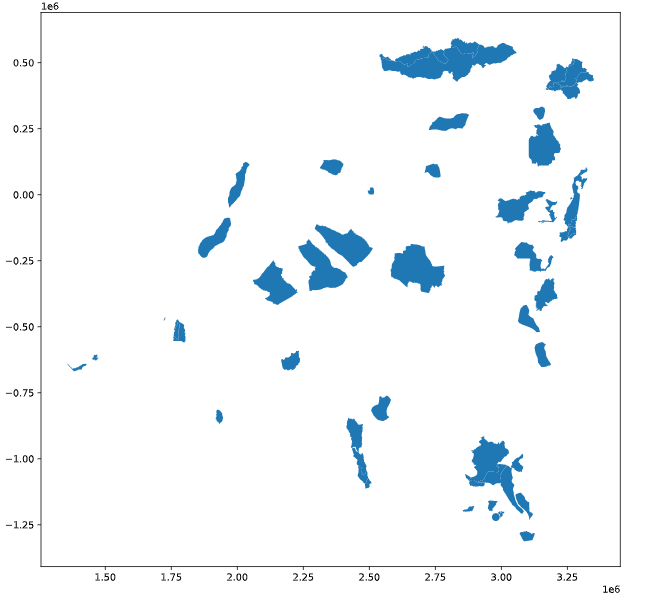

### ***Convert to common CRS and save to a file***

As we have seen in the previous exercises, both datasets are using a <ins>***different Coordinate Reference System (CRS)</ins>***. This is also illustrated by the first plot in this exercise (for which the code is already provided in the script): both datasets are about the same region, so they should normally overlap in their coordinates; but they don't.

For further analyses in the rest of this chapter, we will convert both datasets to the same CRS, and save both to a new file. To ensure we can do distance-based calculations, we will convert them to a projected CRS: the local UTM zone 35, which is identified by EPSG:32735 (https://epsg.io/32735).

The mining sites (`mining_sites`) and national parks (`national_parks`) datasets are already loaded, and GeoPandas and matplotlib are imported.

* Convert both datasets (`mining_sites` and `national_parks`) to EPSG:32735. * Name the results `mining_sites_utm` and `national_parks_utm`.
* Try again to visualize both datasets on a single map. Do both datasets now overlap?

In [ ]:
# Plot the natural parks and mining site data
ax = national_parks.plot()
mining_sites.plot(ax=ax, color='red')
plt.show()

# Convert both datasets to UTM projection
mining_sites_utm = mining_sites.to_crs(epsg=32735)
national_parks_utm = national_parks.to_crs(epsg=32735)

# Plot the converted data again
ax = national_parks_utm.plot()
mining_sites_utm.plot(ax=ax, color='red')
plt.show()

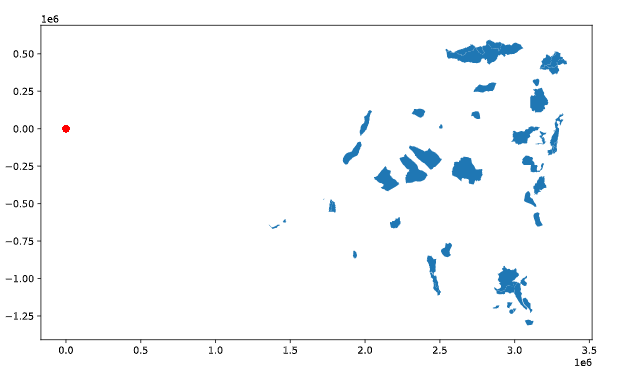

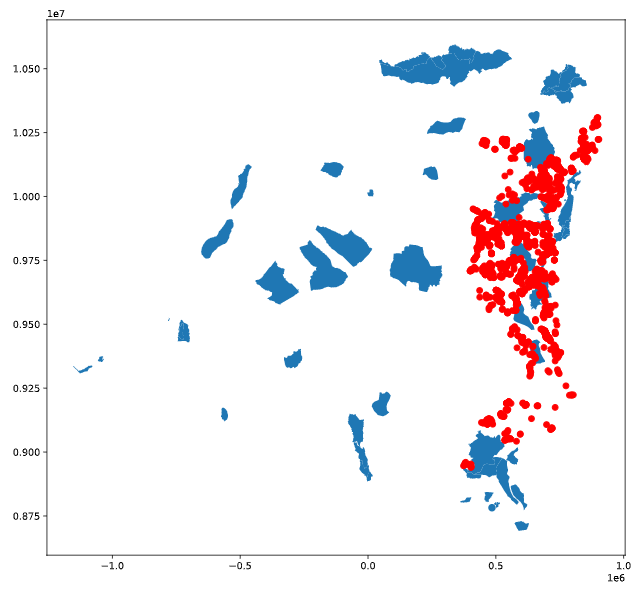

Write `mining_sites_utm` to a GeoPackage file called `"ipis_cod_mines_utm.gpkg"` and write `national_parks_utm` to an ESRI Shapefile called `"cod_conservation_utm.shp"`.

In [ ]:
# Read the mining site data
mining_sites = geopandas.read_file("ipis_cod_mines.geojson")
national_parks = geopandas.read_file("cod_conservation.shp")

# Convert both datasets to UTM projection
mining_sites_utm = mining_sites.to_crs(epsg=32735)
national_parks_utm = national_parks.to_crs(epsg=32735)

# Write converted data to a file
mining_sites_utm.to_file("ipis_cod_mines_utm.gpkg", driver='GPKG')
national_parks_utm.to_file("cod_conservation_utm.shp", driver='ESRI Shapefile')

### ***Styling a multi-layered plot***

Now we have converted both datasets to the same Coordinate Reference System, let's make a nicer plot combining the two.

The datasets in UTM coordinates as we saved them to files in the last exercise are read back in and made available as the `mining_sites` and `national_parks` variables. GeoPandas and matplotlib are already imported.


1. Plot the national parks as green polygons and the mining sites as small dots (a marker size of 5).



In [ ]:
# Plot of the parks and mining sites
ax = national_parks.plot(color='green')
mining_sites.plot(ax=ax,  markersize=5)
plt.show()

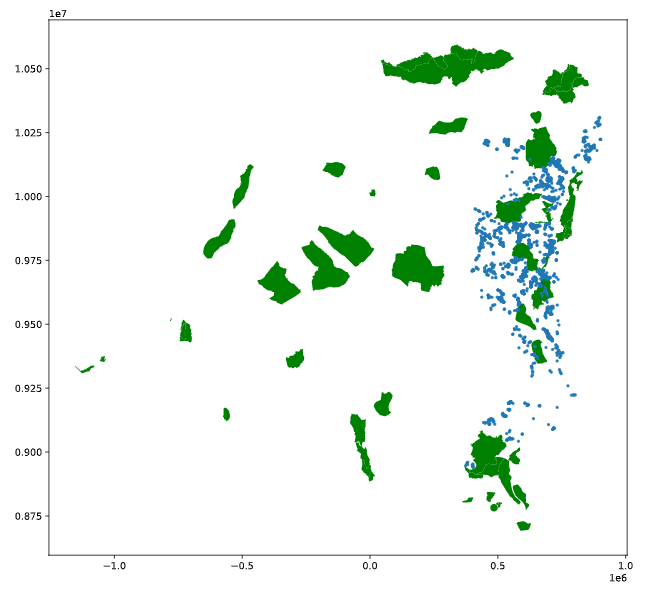

2. Apply an alpha of 0.5 to the mining site points. Further, remove the axis box and labels.

In [ ]:
# Plot of the parks and mining sites
ax = national_parks.plot(color='green')
mining_sites.plot(ax=ax, markersize=5, alpha=0.5)
ax.set_axis_off()
plt.show()

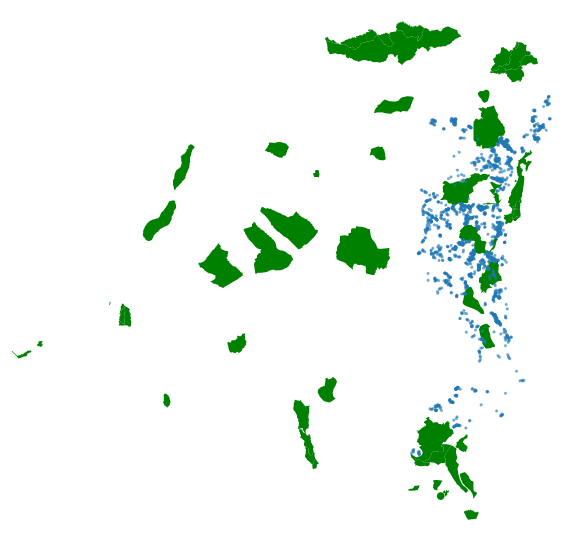

3. Edit the code to color the points based on the `'mineral'` column instead of specifying `alpha`. Make sure to add a `legend`.

In [ ]:
# Plot of the parks and mining sites
ax = national_parks.plot(color='green')
mining_sites.plot(ax=ax, markersize=5, column='mineral', legend=True)
ax.set_axis_off()
plt.show()

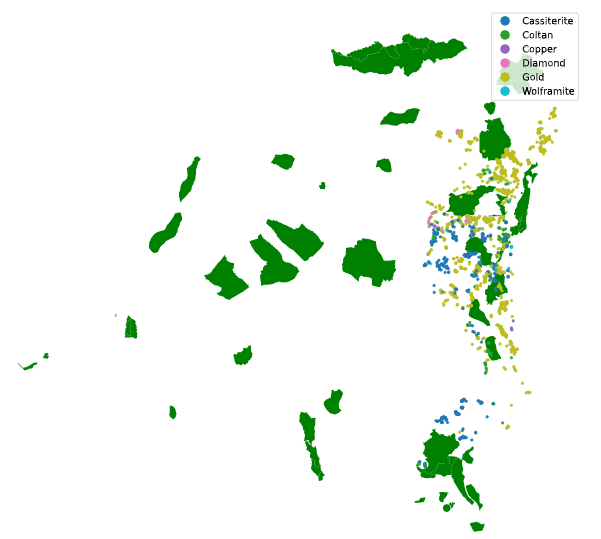

### ***Buffer around a point***

Consider the city of Goma, the capital of the North Kivu province of Congo, close to the border with Rwanda. Its coordinates are 1.66°S 29.22°E (the Point is already provided in UTM coordinates as the `goma` variable).

How many mining sites are located within 50 km of Goma? And how much area of national park? Let's determine that using the ***buffer*** operation. Remember that distances should be expressed in the <ins>unit of the CRS</ins> (i.e. in meter in this case).

Note: if you have a boolean Series (for example as result of a spatial relationship method), then you can calculate how many `True` values (i.e. how many geometries passed the check) by taking the ***sum*** of those booleans because in that case the `True` and `False` values will be seen as ones and zeros.

* Create a ***buffer*** of 50 km around `goma`, and assign it to a variable `goma_buffer`.
* Check which of the points of `mining_sites` are located within this buffer (and call this `mask`). Count those sites by taking the sum of the boolean `mask`, and print this result.
* Calculate the intersections of the national parks with the `buffer`. Take the sum of the area of those intersections, and print the result in km².

In [ ]:
# goma is a Point
print(type(goma))

# Create a buffer of 50km around Goma
goma_buffer = goma.buffer(50000)

# The buffer is a polygon
print(type(goma_buffer))

# Check how many sites are located within the buffer
mask = mining_sites.within(goma_buffer)
print(mask.sum())

# Calculate the area of national park within the buffer
print(national_parks.intersection(goma_buffer).area.sum() / (1000**2))

type(goma)

```
shapely.geometry.point.Point
```

type(goma_buffer)

```
shapely.geometry.polygon.Polygon
```

mining_sites.within(goma_buffer).sum()

```
87
```


national_parks.intersection(goma_buffer).area.sum() / (1000**2)

```
1566.4755910875376
```

Here, you see some applications of a buffer operation. The "within a certain distance" analysis could also be done by actually calculating all the distances. But depending on the case, using the buffer can be more efficient.

### ***Mining sites within national parks***

For this exercise, let's start with one of the national parks, the Kahuzi-Biega National park (which was extracted from the `national_parks` dataset and is provided as the `kahuzi` variable).

Which of the mining sites are located within this national park?

And as a second step: can we determine all mining sites that are located within one of the national parks and in which park?

The mining sites (`mining_sites`) and national parks (`national_parks`) datasets are already loaded, and GeoPandas is already imported.

* Use the `within()` method to subset the mining sites (`mining_sites`) located in the `kahuzi` national park. Call the result `sites_kahuzi`.

* Determine for each of the mining sites if and in which national park it is located. This will create a GeoDataFrame similar to `mining_sites` but with an additional column with national park name. Call this result `sites_within_park`.

* Count the number of sites in each park by using the `value_counts()` method on the `'Name'` column of `sites_within_park`.

In [ ]:
# Extract the single polygon for the Kahuzi-Biega National park
kahuzi = national_parks[national_parks['Name'] == "Kahuzi-Biega National park"].geometry.squeeze()

# Take a subset of the mining sites located within Kahuzi
sites_kahuzi = mining_sites[mining_sites.within(kahuzi)]
print(sites_kahuzi)

# Determine in which national park a mining site is located
sites_within_park = geopandas.sjoin(mining_sites, national_parks, op='within', how='inner')
print(sites_within_park.head())

# The number of mining sites in each national park
print(sites_within_park['Name'].value_counts())

national_parks[national_parks['Name'] == "Kahuzi-Biega National park"]

```
             Type                        Name                                           geometry
21  National park  Kahuzi-Biega National park  POLYGON ((565587.547 9757612.828, 565614.216 9...
```

national_parks[national_parks['Name'] == "Kahuzi-Biega National park"].geometry

```
21    POLYGON ((565587.547 9757612.828, 565614.216 9...
Name: geometry, dtype: geometry
```

national_parks[national_parks['Name'] == "Kahuzi-Biega National park"].geometry.squeeze()

```
<shapely.geometry.polygon.Polygon at 0x7fda42f58490>
```

mining_sites.within(kahuzi)

```
0       False
1       False
2       False
3       False
4       False
        ...  
2138    False
2139    False
2140    False
2141    False
2142    False
Length: 2143, dtype: bool
```


mining_sites[mining_sites.within(kahuzi)]

```
       visit_date                   name  n_workers      mineral                        geometry
661   2013-08-28Z          Ibozia/Kalumé       80.0  Cassiterite  POINT (567832.709 9759143.339)
662   2013-08-26Z                Matamba      150.0  Cassiterite  POINT (598323.539 9758688.142)
663   2013-08-27Z          Mutete/Mukina      170.0  Cassiterite  POINT (570733.437 9761871.114)
664   2013-08-28Z                 Mutete      100.0  Cassiterite  POINT (569881.093 9762219.111)
760   2014-02-25Z              Mazankala      120.0  Cassiterite  POINT (613075.533 9722956.980)
813   2015-07-28Z             Kitendebwa       50.0         Gold  POINT (693078.928 9770107.518)
869   2013-09-28Z           Sebwa-Lukoma      130.0  Cassiterite  POINT (660406.345 9715261.717)
870   2013-10-30Z              Rwamakaza      160.0  Cassiterite  POINT (661266.834 9716072.199)
1481  2009-01-01Z               Mugaba I       50.0         Gold  POINT (685167.371 9744069.967)
1482  2009-01-01Z           Mugaba Ouest       46.0         Gold  POINT (683156.687 9746324.416)
1676  2015-08-02Z  Nguba(Nkuba) kamisoke      122.0  Cassiterite  POINT (622151.349 9808363.111)
```

geopandas.sjoin(mining_sites, national_parks, op='within', how='inner').head()

```
      visit_date          name  n_workers mineral                        geometry  index_right  \
253  2013-09-05Z  Kiviri/Tayna      244.0    Gold  POINT (709734.913 9961013.720)           23   
578  2015-09-02Z   Lubondozi 3       30.0    Gold  POINT (578464.315 9555456.293)           15   
579  2015-09-02Z        Katamu      180.0    Gold  POINT (576249.903 9554313.725)           15   
580  2015-09-02Z     Kimabwe 1      120.0    Gold  POINT (576425.777 9556329.634)           15   
581  2015-09-02Z   Lubondozi 1      300.0    Gold  POINT (579164.711 9554722.924)           15   

               Type                       Name  
253  Nature Reserve       Tayna Nature Reserve  
578  Hunting Domain  Luama-Kivu Hunting Domain  
579  Hunting Domain  Luama-Kivu Hunting Domain  
580  Hunting Domain  Luama-Kivu Hunting Domain  
581  Hunting Domain  Luama-Kivu Hunting Domain  
```

sites_within_park['Name'].value_counts()

```
Itombwe Nature Reserve          21
Luama-Katanga Hunting Domain    14
Kahuzi-Biega National park      11
Luama-Kivu Hunting Domain        9
Okapi Faunal Reserve             5
Maiko National park              3
Tayna Nature Reserve             1
Name: Name, dtype: int64
```

### ***Finding the name of the closest National Park***

Let's start with a custom query for a single mining site. Here, we will determine the name of the national park that is the closest to the specific mining site.

The datasets on the mining sites (`mining_sites`) and national parks (`national_parks`) are already loaded.

* Select the first element of geometry and assign it to a variable called `single_mine`.
* Calculate the distance from each of the national parks to the `single_mine`. Call the result `dist`.
* Obtain the index for the minimum of dist with the `idxmin()` method.
* Get the name of the closest national park using the obtained index with the `.loc[]` attribute, and print the result.

In [ ]:
# Get the geometry of the first row
single_mine = mining_sites.geometry[0]

# Calculate the distance from each national park to this mine
dist = national_parks.distance(single_mine)

# The index of the minimal distance
idx = dist.idxmin()

# Access the name of the corresponding national park
closest_park = national_parks.loc[idx, 'Name']
print(closest_park)

mining_sites.geometry[0]

```
<shapely.geometry.point.Point at 0x7fcafb87f6d0>
```

national_parks.distance(single_mine).head()

```
0    1.976e+06
1    4.383e+05
2    8.370e+04
3    9.724e+05
4    8.411e+05
dtype: float64
```


dist.idxmin()

```
22
```

national_parks.loc[idx, 'Name']

```
'Virunga National park'
```

### ***Applying a custom operation to each geometry***

Now we know how to get the closest national park for a single point, let's do this for all points. For this, we are first going to write a function, taking a single point as argument and returning the desired result. Then we can use this function to apply it to all points.

The datasets on the mining sites (`mining_sites`) and national parks (`national_parks`) are already loaded. The single mining site from the previous exercises is already defined as `single_mine`.

* Create a function `closest_national_park()` that performs the analysis you did in the previous exercise: given a single point and all national parks, return the name of the closest national park.

* As a test, call this function on the single point (`single_mine`) and print the result. Is it the same as before ("Virunga National park")?

* Apply this function to all points of `mining_sites` and assign the result to a column called `'closest_park'`.

In [ ]:
# Define a function that returns the closest national park
def closest_national_park(geom, national_parks):
    dist = national_parks.distance(geom)
    idx = dist.idxmin()
    closest_park = national_parks.loc[idx, 'Name']
    return closest_park

# Call the function on single_mine
print(closest_national_park(single_mine, national_parks))

# Apply the function to all mining sites
mining_sites['closest_park'] = mining_sites.geometry.apply(closest_national_park, national_parks=national_parks)
print(mining_sites.head())

mining_sites.head()

```

    visit_date                                name  n_workers mineral  \
0  2013-03-27Z                           Mayi-Tatu      150.0    Gold   
1  2013-03-27Z                             Mabanga      115.0    Gold   
2  2013-03-27Z                             Molende      130.0    Gold   
3  2013-03-27Z                          Embouchure      135.0    Gold   
4  2013-03-27Z  Apumu-Atandele-Jerusalem-Luka Yayo      270.0    Gold   

                          geometry           closest_park  
0  POINT (796089.416 10111855.174)  Virunga National park  
1  POINT (795899.664 10110990.840)  Virunga National park  
2  POINT (795641.707 10109059.787)  Virunga National park  
3  POINT (794376.309 10110622.250)  Virunga National park  
4  POINT (796057.504 10105781.548)  Virunga National park  
```

### ***Import and plot raster data***

In this exercise, we are going to use a raster dataset of the vegetation types map (available from http://www.wri.org). The raster values take a set of discrete values indicating the type of vegetation. Let's start with reading the data and plotting it together with the mining site data.

The mining sites dataset (`mining_sites`) is already loaded, and GeoPandas and matplotlib are already imported.

* Import the `rasterio` package.
* Open the vegetation map geotiff file (`"central_africa_vegetation_map_foraf.tif"`) and assign it to a variable `src`.

* Plot the raster dataset using the `rasterio.plot.show()` function and add the mining site locations in red and marker size of 1.

In [ ]:
# Import the rasterio package
import rasterio

# Open the raster dataset
src = rasterio.open("central_africa_vegetation_map_foraf.tif")

# Import the plotting functionality of rasterio
import rasterio.plot

# Plot the raster layer with the mining sites
ax = rasterio.plot.show(src)
mining_sites.plot(ax=ax, markersize=1, color='red')
plt.show()

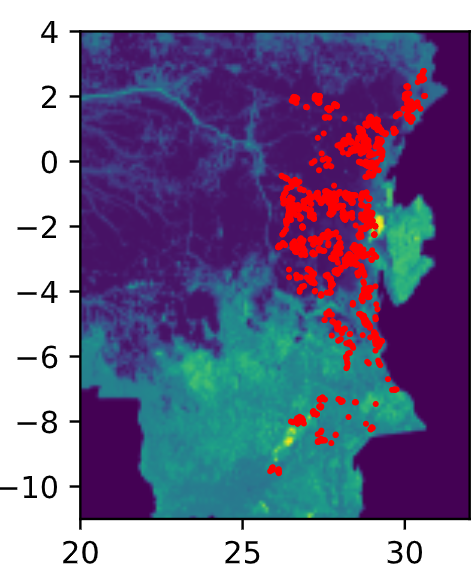

### ***Extract information from raster layer***

Let's now extract information from the raster layer, based on a vector file. This functionality is provided by the rasterstats package. Specifically for this exercise, we will determine the vegetation type at all mining sites, by getting the nearest raster pixel value at each point of the mining site dataset.

A subset of the mining sites dataset (`mining_sites`) is already loaded, and GeoPandas and matplotlib are already imported.


* Import the `rasterstats` package.

* Extract the nearest raster value for the mining site locations (`mining_sites`) using the `rasterstats.point_query()` function, and assign this to a new column `'vegetation'`.

* Make a plot of the mining site data using the `'vegetation'` column to color the points. Make sure to add a `legend`.

In [ ]:
# Import the rasterstats package
import rasterstats

# Extract the nearest value in the raster for all mining sites
vegetation_raster = "central_africa_vegetation_map_foraf.tif"
mining_sites['vegetation'] = rasterstats.point_query(mining_sites['geometry'], vegetation_raster, interpolate='nearest')
print(mining_sites.head())

# Replace numeric vegation types codes with description
mining_sites['vegetation'] = mining_sites['vegetation'].replace(vegetation_types)

# Make a plot indicating the vegetation type
mining_sites.plot(column='vegetation', legend=True)
plt.show()

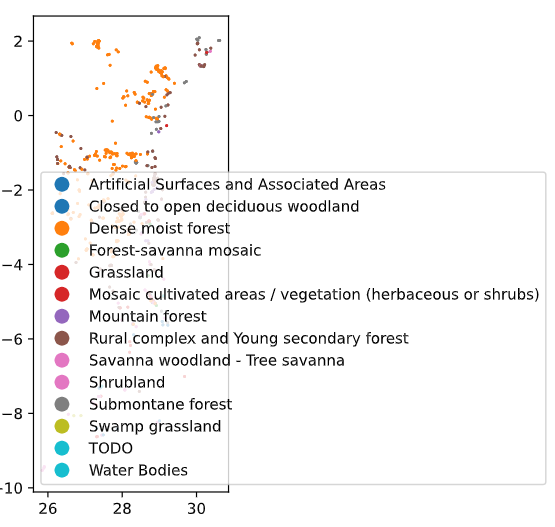